<a href="https://colab.research.google.com/github/ana-gleice/SAP-4/blob/main/GB__CV_ML_Marco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
dataset = pd.read_excel('dataset_mar.xlsx')


In [ ]:
dataset.head()

,DS_MARCA,NO_MODELO,NR_SERIE,NR_ANO,DT_ENSAIO,DS_METODO,TP_ENSAIO,UF_ENSAIO,DS_RESULTADO,ERRO_MEDIO_1,DESVIO_CONC_I,ERRO_MEDIO_2,DESVIO_CONC_II,ERRO_MEDIO_3,DESVIO_CONC_III,DIF_ANTERIOR_1,DIF_ANTERIOR_2,DIF_ANTERIOR_3,CLASSE
0,ALCOLIZER,LE5,22000002,2019,43809,MRC Líquido,Subsequente,PE,Aprovado,-0.0016,0.002,-0.0052,0.001,-0.0076,0.836,-0.0060,-0.0050,-0.0128,0
1,ALCOLIZER,LE5,22000339,2019,43788,MRC Líquido,Inicial,PE,Aprovado,-0.0054,0.002,-0.0132,0.003,-0.0102,0.193,-0.0222,-0.0428,-0.0392,0
2,ALCOLIZER,LE5,22000372,2019,43788,MRC Líquido,Inicial,PE,Aprovado,-0.0074,0.001,-0.0162,0.001,-0.0168,0.257,0.1916,0.3028,0.4022,0
3,ALCOLIZER,LE5,22000575,2019,43788,MRC Líquido,Inicial,PE,Aprovado,-0.0062,0.002,-0.0154,0.001,-0.0124,0.352,0.1928,0.3036,0.4066,0
4,DRAGER,ALCOTEST 7410 PLUS,ARAA-0279,2016,42692,MRC Gasoso,Subsequente,RS,Aprovado,-0.0113,0.003,-0.0225,0.009,-0.0485,1.609,-0.0018,-0.0079,-0.0167,1


In [21]:
x = dataset.drop(columns=['DS_MARCA', 'NO_MODELO', 'NR_SERIE', 'NR_ANO', 'DT_ENSAIO', 'DS_METODO', 'TP_ENSAIO', 'UF_ENSAIO', 'DS_RESULTADO',  'CLASSE']).values
y = dataset.iloc[:,-1].values

In [22]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x, y = rus.fit_sample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=5)

1    354
0    330
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


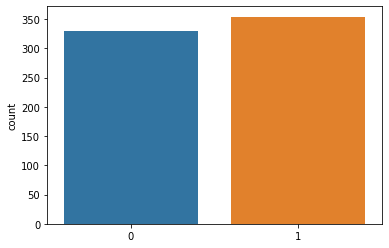

In [ ]:
print(pd.Series(y_train).value_counts())
sns.countplot(y_train);

## Treinamento com DADOS **Balanceados** e Testar com x_train (x_res)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
model = GradientBoostingClassifier(n_estimators=500, learning_rate= 0.8, max_depth=1, random_state=0)
from sklearn.metrics import confusion_matrix, accuracy_score

scores = cross_val_score(model, x, y, cv=10)
print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.72093023 0.6744186  0.6627907  0.72093023 0.58139535 0.6744186
 0.62352941 0.58823529 0.55294118 0.56470588]
0.64 accuracy with a standard deviation of 0.06


In [ ]:
for i in range(len(y_train)):
  if ((y_train[i] == 0) & (y_pred_train[i] == 1)): 
    y_train[i] = 1 
    #print(i)


Não faz sentido alterar o y_train se não for para treinar novamente!!!!

In [ ]:
model.fit(x_train, y_train)
 
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train) 
# imprimir relatório de classificação
print("Relatório de Classificação KNN:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
 
cm_reg = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_train, y_pred_train )
print('Matriz de Confusão KNN: \n {}'.format(cm_reg))
print('Matriz de Confusão KNN train: \n {}'.format(cm))

Relatório de Classificação KNN:
               precision    recall  f1-score   support

           0     0.7018    0.4082    0.5161        98
           1     0.4957    0.7703    0.6032        74

    accuracy                         0.5640       172
   macro avg     0.5987    0.5892    0.5597       172
weighted avg     0.6131    0.5640    0.5536       172

Acurácia: 0.5640

Matriz de Confusão KNN: 
 [[40 58]
 [17 57]]
Matriz de Confusão KNN train: 
 [[187  41]
 [ 42 414]]
